In [1]:
import kornia_rs
import tensorflow as tf
import cv2
import PIL

print("Kornia-rs: " + kornia_rs.__version__)
print("Tensorflow: " + tf.__version__)
print("OpenCV: " + cv2.__version__)
print("PIL/Pillow: " + PIL.__version__)

2025-04-18 00:04:34.421200: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-18 00:04:34.423453: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-18 00:04:34.429901: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744914874.440811   47507 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744914874.443867   47507 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744914874.452586   47507 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Kornia-rs: 0.1.9-rc.3
Tensorflow: 2.19.0
OpenCV: 4.11.0
PIL/Pillow: 11.2.1


In [ ]:
# PNG Decoding

import io
from PIL import Image
import numpy as np
import timeit

N = 500

with open("data/720p.png", "rb") as f:
    image_720p = f.read()

with open("data/1080p.png", "rb") as f:
    image_1080p = f.read()

with open("data/2k.png", "rb") as f:
    image_2k = f.read()

with open("data/4k.png", "rb") as f:
    image_4k = f.read()

# ============================
# Kornia-rs
# ============================
def load_with_kornia_rs_720p():
    np.array(kornia_rs.decode_image_png(image_720p, [720, 1280], "rgb8"))

def load_with_kornia_rs_1080p():
    np.array(kornia_rs.decode_image_png(image_1080p, [1080, 1920], "rgb8"))

def load_with_kornia_rs_2k():
    np.array(kornia_rs.decode_image_png(image_2k, [1440, 2560], "rgb8"))

def load_with_kornia_rs_4k():
    np.array(kornia_rs.decode_image_png(image_4k, [2160, 3840], "rgb8"))

# ============================
# PIL
# ============================
def load_with_pil_720p():
    np.array(Image.open(io.BytesIO(image_720p)))

def load_with_pil_1080p():
    np.array(Image.open(io.BytesIO(image_1080p)))

def load_with_pil_2k():
    np.array(Image.open(io.BytesIO(image_2k)))

def load_with_pil_4k():
    np.array(Image.open(io.BytesIO(image_4k)))

# ============================
# TensorFlow
# ============================
tf.config.threading.set_intra_op_parallelism_threads(1)
tf.config.threading.set_inter_op_parallelism_threads(1)

def load_with_tf_720p():
    np.array(tf.io.decode_image(image_720p, channels=3))

def load_with_tf_1080p():
    np.array(tf.io.decode_image(image_1080p, channels=3))

def load_with_tf_2k():
    np.array(tf.io.decode_image(image_2k, channels=3))

def load_with_tf_4k():
    np.array(tf.io.decode_image(image_4k, channels=3))

# ============================
# OpenCV
# ============================
cv2.setNumThreads(1)

def load_with_cv2_720p():
    np.array(cv2.imdecode(np.frombuffer(image_720p, np.uint8), cv2.IMREAD_COLOR))

def load_with_cv2_1080p():
    np.array(cv2.imdecode(np.frombuffer(image_1080p, np.uint8), cv2.IMREAD_COLOR))

def load_with_cv2_2k():
    np.array(cv2.imdecode(np.frombuffer(image_2k, np.uint8), cv2.IMREAD_COLOR))

def load_with_cv2_4k():
    np.array(cv2.imdecode(np.frombuffer(image_4k, np.uint8), cv2.IMREAD_COLOR))

kornia_rs_720p = timeit.timeit(load_with_kornia_rs_720p, number=N) / N * 1e3
kornia_rs_1080p = timeit.timeit(load_with_kornia_rs_1080p, number=N) / N * 1e3
kornia_rs_2k = timeit.timeit(load_with_kornia_rs_2k, number=N) / N * 1e3
kornia_rs_4k = timeit.timeit(load_with_kornia_rs_4k, number=N) / N * 1e3

pil_720p = timeit.timeit(load_with_pil_720p, number=N) / N * 1e3
pil_1080p = timeit.timeit(load_with_pil_1080p, number=N) / N * 1e3
pil_2k = timeit.timeit(load_with_pil_2k, number=N) / N * 1e3
pil_4k = timeit.timeit(load_with_pil_4k, number=N) / N * 1e3

tf_720p = timeit.timeit(load_with_tf_720p, number=N) / N * 1e3
tf_1080p = timeit.timeit(load_with_tf_1080p, number=N) / N * 1e3
tf_2k = timeit.timeit(load_with_tf_2k, number=N) / N * 1e3
tf_4k = timeit.timeit(load_with_tf_4k, number=N) / N * 1e3

cv2_720p = timeit.timeit(load_with_cv2_720p, number=N) / N * 1e3
cv2_1080p = timeit.timeit(load_with_cv2_1080p, number=N) / N * 1e3
cv2_2k = timeit.timeit(load_with_cv2_2k, number=N) / N * 1e3
cv2_4k = timeit.timeit(load_with_cv2_4k, number=N) / N * 1e3

2025-04-18 00:07:00.729485: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [ ]:
print("kornia_rs 720p = " + str(kornia_rs_720p))
print("kornia_rs 1080p = " + str(kornia_rs_1080p))
print("kornia_rs 2k = " + str(kornia_rs_2k))
print("kornia_rs 4k = " + str(kornia_rs_4k))

print("pil 720p = " + str(pil_720p))
print("pil 1080p = " + str(pil_1080p))
print("pil 2k = " + str(pil_2k))
print("pil 4k = " + str(pil_4k))

print("Tensorflow 720p = " + str(tf_720p))
print("Tensorflow 1080p = " + str(tf_1080p))
print("Tensorflow 2k = " + str(tf_2k))
print("Tensorflow 4k = " + str(tf_4k))

print("OpenCV 720p = " + str(cv2_720p))
print("OpenCV 1080p = " + str(cv2_1080p))
print("OpenCV 2k = " + str(cv2_2k))
print("OpenCV 4k = " + str(cv2_4k))

kornia_rs 720p = 5.401285375999578
kornia_rs 1080p = 11.66895762599961
kornia_rs 2k = 21.378176021999025
kornia_rs 4k = 52.88590423400092
pil 720p = 8.509049309999682
pil 1080p = 20.064421320001202
pil 2k = 39.58929221999824
pil 4k = 130.22620697999992
Tensorflow 720p = 7.2067857759993785
Tensorflow 1080p = 15.786766477998752
Tensorflow 2k = 29.851159331999952
Tensorflow 4k = 87.84313406799993
OpenCV 720p = 7.499536819999776
OpenCV 1080p = 17.544959587999983
OpenCV 2k = 34.447640541999135
OpenCV 4k = 98.12566102600067


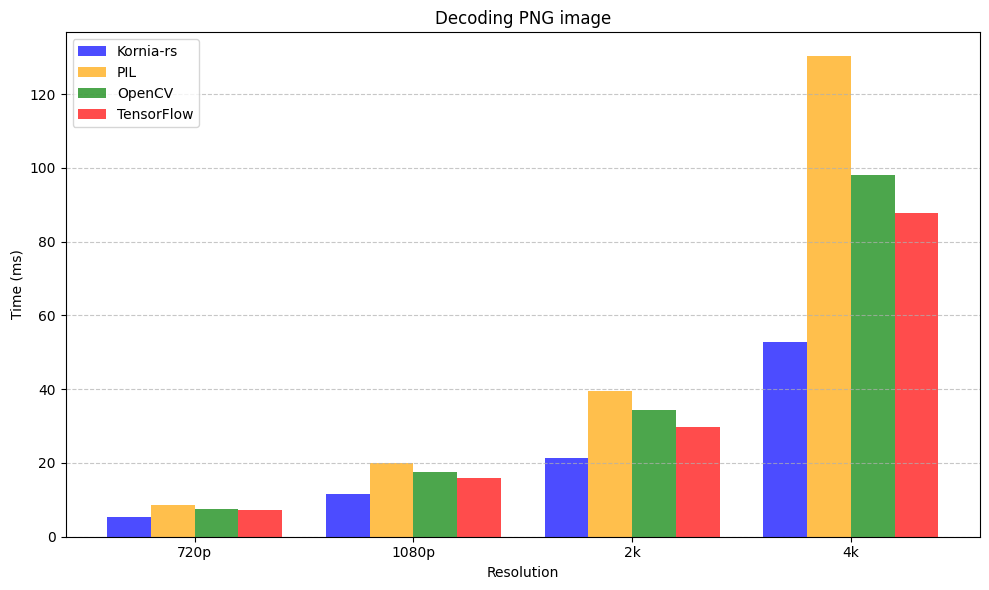

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

# Resolutions and average times
resolutions = ['720p', '1080p', '2k', '4k']
kornia_rs_avg = [kornia_rs_720p, kornia_rs_1080p, kornia_rs_2k, kornia_rs_4k]
# kornia_rs_raw_avg = [kornia_rs_raw_720p, kornia_rs_raw_1080p, kornia_rs_raw_2k, kornia_rs_raw_4k]
opencv_avg = [cv2_720p, cv2_1080p, cv2_2k, cv2_4k]
pil_avg = [pil_720p, pil_1080p, pil_2k, pil_4k]
tf_avg = [tf_720p, tf_1080p, tf_2k, tf_4k]

# Bar width and positions
bar_width = 0.20
x = np.arange(len(resolutions))

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(x - (1.5 * bar_width), kornia_rs_avg, bar_width, label='Kornia-rs', color='blue', alpha=0.7)
plt.bar(x - (0.5 * bar_width), pil_avg, bar_width, label='PIL', color='orange', alpha=0.7)
plt.bar(x + (0.5 * bar_width), opencv_avg, bar_width, label='OpenCV', color='green', alpha=0.7)
plt.bar(x + (1.5 * bar_width), tf_avg, bar_width, label="TensorFlow", color="red", alpha=0.7)

# Adding labels, title, and legend
plt.xlabel('Resolution')
plt.ylabel('Time (ms)')
plt.title('Decoding PNG image')
plt.xticks(x, resolutions)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()